In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
#plot the depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score


df = pd.read_csv('data/fashion_half.csv', delimiter=',', quotechar='"')
features = df.loc[:,"pixel1":"pixel784"]
labels = df["label"]
#1 for malignant 0 for benign


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)


In [ ]:
from sklearn import svm 
from sklearn import svm

C = [0.001,0.01, 0.1, 1, 10, 100]
train_acc = []
test_acc = []

cross_val_acc_avg = []
cross_val_acc_std = []



estimators = []
    
for i, o in enumerate(C):
    print ('C=' + str(o))
    clf = svm.SVC(C=o, gamma='auto', kernel='poly', degree=3)
    scores_acc =cross_validate(clf, X_train, y_train, cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_acc['test_score'])
    estimators.append(scores_acc['estimator'][ind])

    cross_val_acc_std.append(np.std(scores_acc['test_score']))
    cross_val_acc_avg.append(np.average(scores_acc['test_score']))

    est = scores_acc['estimator'][ind]

    train_acc.append(accuracy_score(y_train, est.predict(X_train)))
    test_acc.append(accuracy_score(y_test, est.predict(X_test)))


    print(confusion_matrix(y_test, est.predict(X_test)))

C=0.001
[[1482   10   36   21    1]
 [  16 1476    7    3    1]
 [  21   10 1407   22    0]
 [  29    3   16 1451    7]
 [   4    1    0    0 1476]]
C=0.01
[[1482   10   36   21    1]
 [  16 1476    7    3    1]
 [  21   10 1407   22    0]
 [  29    3   16 1451    7]
 [   4    1    0    0 1476]]
C=0.1


In [ ]:
#plot C
from matplotlib import ticker
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')
x1 = [0.001, 0.01, 0.1, 1]
x2 = [10,100]


ax.plot(x1, train_acc[:4], linestyle='-',  label='train accuracy')
ax2.plot(x2, train_acc[4:], linestyle='-',  label='train accuracy')


ax.plot(x1, test_acc[:4],  linestyle='-', color='red', label='test accuracy')
ax2.plot(x2, test_acc[4:], linestyle='-', color='red', label='test accuracy')





ax.set_xlim(-0.1,1.1)
ax2.set_xlim(9,100)

ax.errorbar(x1, cross_val_acc_avg[:4],yerr=list(cross_val_acc_std[:4]),linestyle='-', fmt='x',color='green', label='cross validation based on accuracy error')
ax2.errorbar(x2, cross_val_acc_avg[4:],yerr=list(cross_val_acc_std[4:]),linestyle='-', fmt='x',color='green', label='cross validation based on accuracy error')



# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()



# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.
ax2.set_title('FM SVM: Precision and Recall vs.  C', loc='right')
ax.set_xlabel("C")
ax.set_ylabel("Score")
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.legend()
plt.show()

In [2]:
#Changing kernels 
#Changing test size
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score

from sklearn import svm 

#X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)

kernels = ['linear', 'poly']
#kNN
#rbf doesn't work. 
portions = range(10, 101, 10)

train_acc = []
test_acc = []
cross_val_acc_avg = []
cross_val_acc_std = []

for i in kernels:

    depth_train_acc = []
    depth_test_acc = []

    depth_cross_val_acc_avg = []
    depth_cross_val_acc_std = []
    estimators = []



    for count, o in enumerate(portions):

        end = int(len(X_train)* o/100.0)
        print (end)
        clf = svm.SVC(C=10, gamma='auto', kernel=i, degree=3)
        scores_acc =cross_validate(clf, X_train[:end], y_train[:end], cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

        ind= np.argmax(scores_acc['test_score'])
        estimators.append(scores_acc['estimator'][ind])


        depth_cross_val_acc_std.append(np.std(scores_acc['test_score']))
        depth_cross_val_acc_avg.append(np.average(scores_acc['test_score']))

        est = scores_acc['estimator'][ind]

        depth_train_acc.append(accuracy_score(y_train[:end], est.predict(X_train[:end])))
        depth_test_acc.append(accuracy_score(y_test, est.predict(X_test)))

        print(confusion_matrix(y_test, est.predict(X_test)))
    train_acc.append(depth_train_acc)
    test_acc.append(depth_test_acc)
    cross_val_acc_avg.append(depth_cross_val_acc_avg)
    cross_val_acc_std.append(depth_cross_val_acc_std)

2250
[[1368   18   31   37    0]
 [  23 1456    8    2    0]
 [  32    4 1478   26    0]
 [  24    3   16 1457    3]
 [   1    0    0    5 1508]]
4500
[[1397   17   15   25    0]
 [  20 1457    9    3    0]
 [  35    6 1477   22    0]
 [  52    1   12 1434    4]
 [   2    0    0    1 1511]]
6750
[[1388   28   14   24    0]
 [  25 1455    6    3    0]
 [  28    4 1488   20    0]
 [  47    2   15 1435    4]
 [   0    0    0    2 1512]]
9000
[[1399   11   20   24    0]
 [  35 1447    3    4    0]
 [  35    3 1486   16    0]
 [  40    1   15 1443    4]
 [   0    0    0    0 1514]]
11250
[[1385   18   24   27    0]
 [  22 1456    5    6    0]
 [  36    5 1477   22    0]
 [  47    0   19 1434    3]
 [   1    0    0    0 1513]]
13500
[[1388   16   23   27    0]
 [  17 1464    6    2    0]
 [  42    8 1479   11    0]
 [  64    1   19 1416    3]
 [   1    0    0    1 1512]]
15750
[[1395   14   19   26    0]
 [  19 1460    6    4    0]
 [  34    5 1479   22    0]
 [  50    3   20 1426    4]
 [  

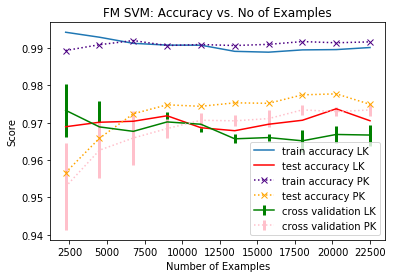

In [10]:
#depth tree graph 
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM SVM: Accuracy vs. No of Examples')
#plt.ylim((0.9,1))
ps=[int(len(X_train)* p/100.0) for p in portions]

ps = [int(len(X_train)* p/100.0) for p in portions]
plt.plot(ps, list(train_acc[0]), label='train accuracy LK', linestyle='-')

plt.plot(ps, list(test_acc[0]), color='red',  label='test accuracy LK',linestyle='-')

plt.errorbar(ps, list(cross_val_acc_avg[0]),yerr=list(cross_val_acc_std[0]), elinewidth=3,linestyle='-', label='cross validation LK', color='green')

plt.plot(ps, list(train_acc[1]), 'x', color='indigo', label='train accuracy PK', linestyle=':')

plt.plot(ps, list(test_acc[1]),'x',color='orange',  label='test accuracy PK',linestyle=':')

plt.errorbar(ps, list(cross_val_acc_avg[1]),yerr=list(cross_val_acc_std[1]), elinewidth=3,linestyle=':', label='cross validation PK', color='pink')


plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [14]:
test_acc[0]

[0.9689333333333333,
 0.9701333333333333,
 0.9704,
 0.9718666666666667,
 0.9686666666666667,
 0.9678666666666667,
 0.9696,
 0.9706666666666667,
 0.9737333333333333,
 0.9705333333333334]

In [13]:
test_acc[1]

[0.9566666666666667,
 0.9658666666666667,
 0.9724,
 0.9748,
 0.9744,
 0.9753333333333334,
 0.9752,
 0.9774666666666667,
 0.9777333333333333,
 0.9749333333333333]